In [1]:
import scanpy as sc
import scgen

Using TensorFlow backend.


In [2]:
sc.set_figure_params(frameon=False)

In [3]:
ad = sc.read('pancreas.h5ad', backup_url='https://www.dropbox.com/s/qj1jlm9w10wmt0u/pancreas.h5ad?dl=1')

In [4]:
del ad.uns['celltype_colors']

In [5]:
ad_0_3 = ad[ad.obs.batch.isin(['0', '3'])].copy()

In [6]:
ad_ref = ad[ad.obs.batch.isin(['0'])].copy()
ad_new = ad[ad.obs.batch.isin(['3'])].copy()
del ad_ref.uns['pca']

In [7]:
ad_ref.obs['cell_type'] = ad_ref.obs['celltype'].tolist()

In [10]:
network = scgen.VAEArithKeras(x_dimension=ad_ref.shape[1], model_path='./')
#network.restore_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 2448)              0         
_________________________________________________________________
encoder (Model)              (None, 100)               2765000   
_________________________________________________________________
decoder (Model)              (None, 2448)              2687248   
Total params: 5,452,248
Trainable params: 5,445,848
Non-trainable params: 6,400
_________________________________________________________________


In [ ]:
network.train(train_data=ad_ref, n_epochs=100)

In [11]:
ad_ref.obsm['X_scgen'] = network.to_latent(ad_ref.X)

In [ ]:
sc.pp.neighbors(ad_ref, use_rep='X_scgen')
sc.tl.umap(ad_ref)

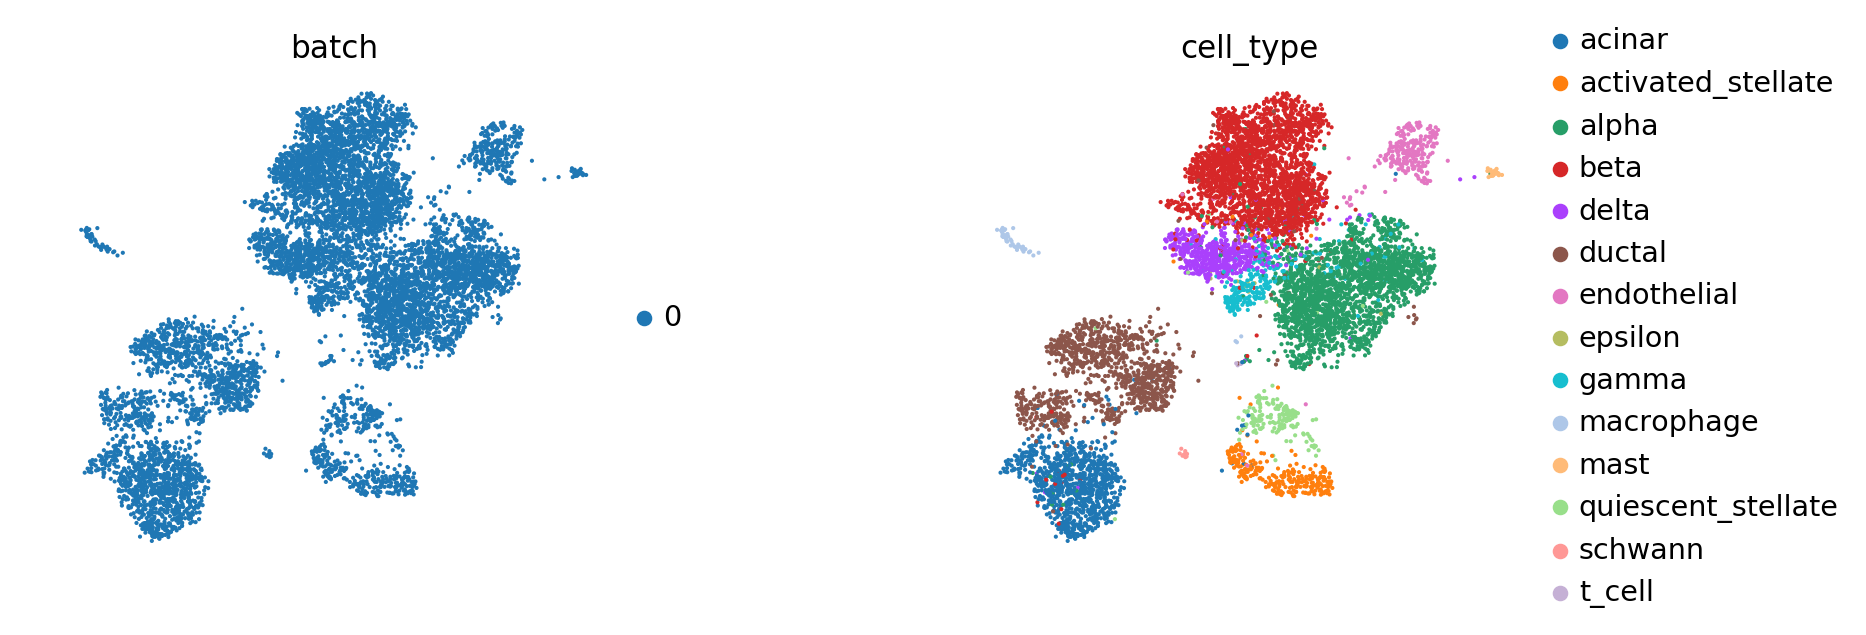

In [16]:
sc.pl.umap(ad_ref, color=['batch', 'cell_type'], wspace=.5)

In [17]:
ad_new.obsm['X_scgen'] = network.to_latent(ad_new.X)

In [ ]:
ad_joint = sc.tl.ingest(ad_new, ad_ref, obs='cell_type', embedding_method='umap', k=15, 
                        batch_key='ing_batch', return_joint=True)

... storing 'batch' as categorical
... storing 'cell_type' as categorical
... storing 'celltype' as categorical
... storing 'louvain' as categorical
... storing 'sample' as categorical


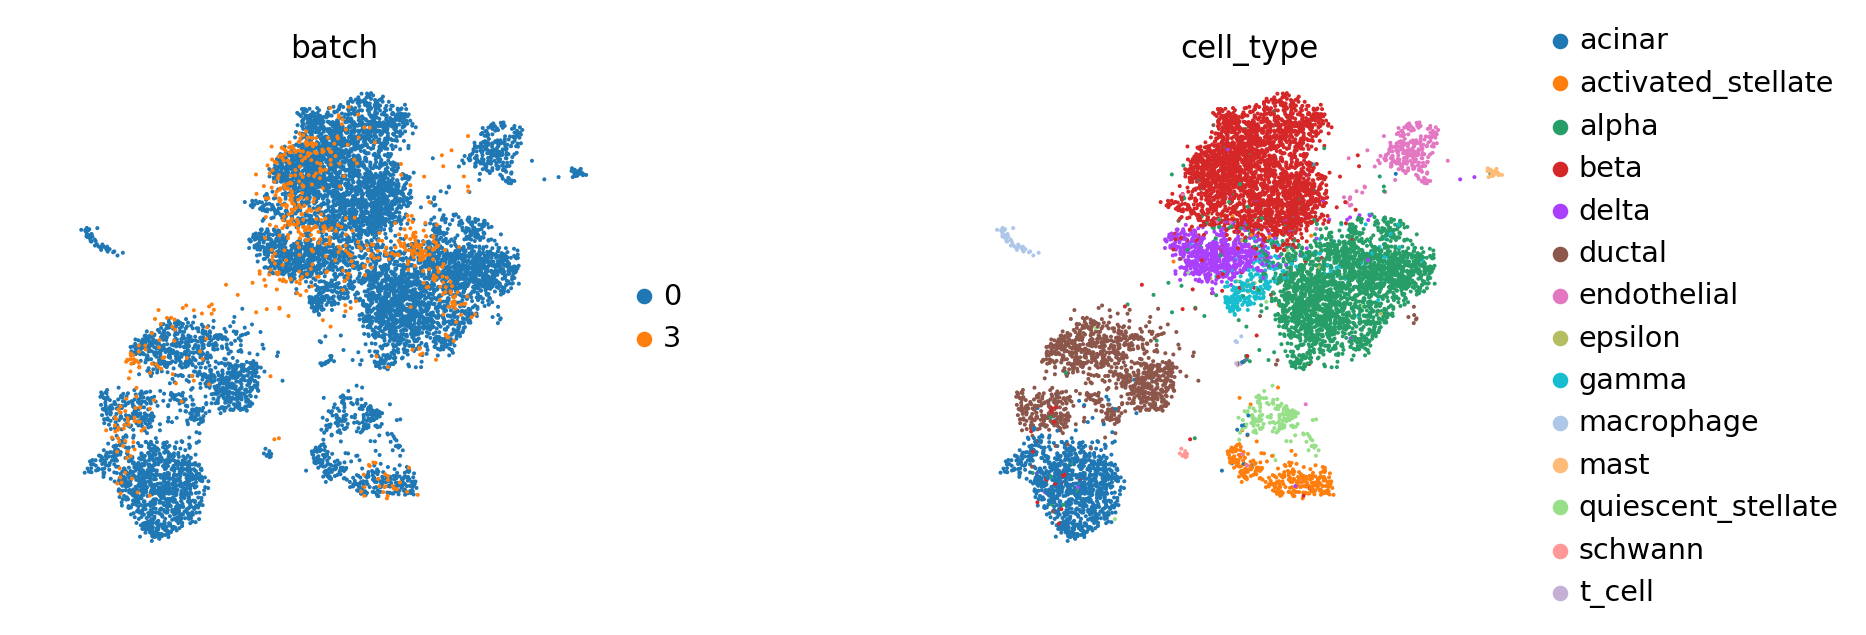

In [21]:
sc.pl.umap(ad_joint, color=['batch', 'cell_type'], wspace=.5)

In [ ]:
sc.pp.neighbors(ad_joint, use_rep='X_scgen')

In [25]:
ad_new = ad[ad.obs.batch.isin(['2'])].copy()

In [27]:
ad_new.obsm['X_scgen'] = network.to_latent(ad_new.X)

In [ ]:
ad_0_3_2 = sc.tl.ingest(ad_new, ad_joint, obs='cell_type', embedding_method='umap', k=15, 
                        batch_key='ing_batch', return_joint=True)

... storing 'batch' as categorical
... storing 'cell_type' as categorical
... storing 'celltype' as categorical
... storing 'louvain' as categorical
... storing 'sample' as categorical


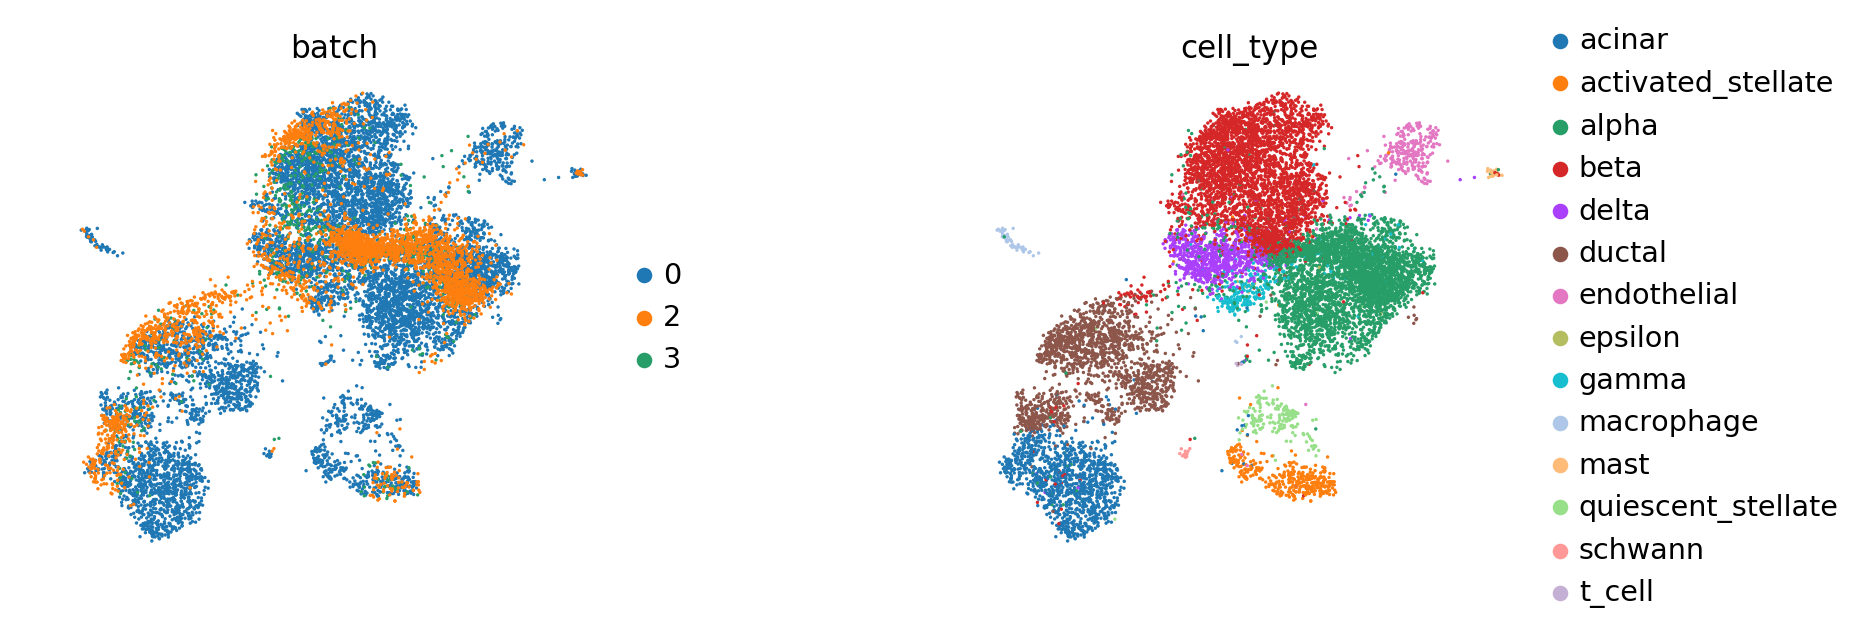

In [29]:
sc.pl.umap(ad_0_3_2, color=['batch', 'cell_type'], wspace=.5)